In [1]:
import pandas as pd

### 1. Загрузите файл HR.csv в pandas dataframe

In [2]:
df = pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### 2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [3]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<AxesSubplot:>

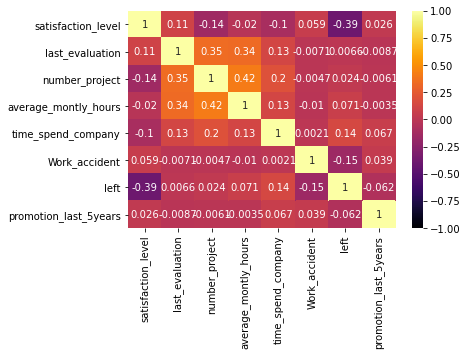

In [25]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, center= 0, annot=True, cmap='inferno')

#### Две самые скоррелированные переменные:
- average_monthly_hours (Среднее количество часов на рабочем месте в месяц);
- number_projects (Количество проектов, выполненных за время работы).

#### Две наименее скоррелированные переменные: 
- work_accident (Происходили ли несчастные случаи на рабочем месте с сотрудником);
- time_spend_company (Стаж работы в компании в годах).

### 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [8]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

### 5. Показать распределение сотрудников по зарплатам.

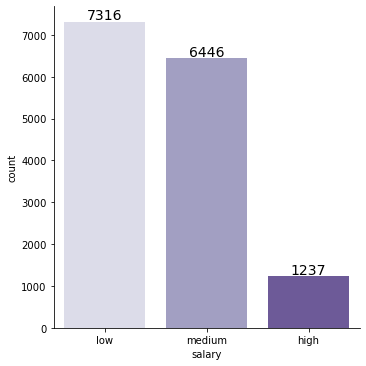

In [9]:
g = sns.catplot(x=df['salary'], kind='count', palette='Purples', data=df)

x=0
for row in df['salary'].value_counts():
        g.ax.text(x=x, y=row+50, s=row, color='black', size=14,
                ha='center');
        x+=1

### 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

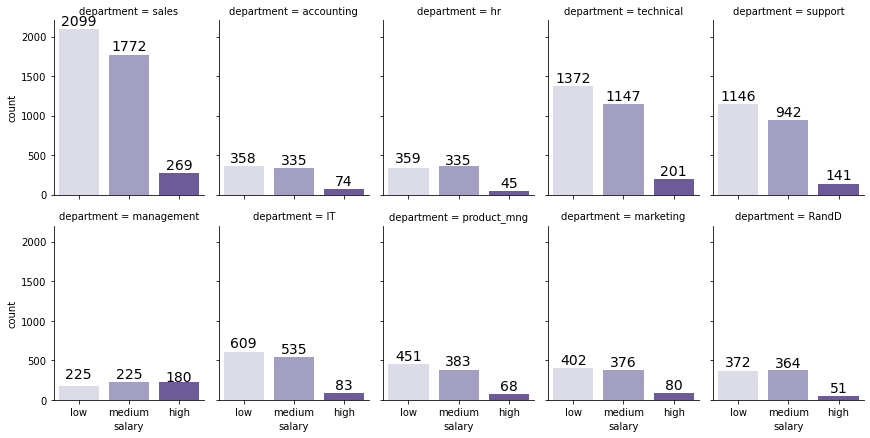

In [10]:
g = sns.catplot(x="salary", col="department", col_wrap=5,
                data=df,
                kind="count", height=3, aspect=.8, palette='Purples'
               )

for i, dep in enumerate(df['department'].unique()):
    x=0
    for row in df[df['department'] == dep]['salary'].value_counts():
        g.axes[i].text(x=x, y=row+50, s=row, color='black', size=14,
                ha='center');
        x+=1
    
        

### 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [11]:
import scipy.stats as stats

high_salary_hours = df[df['salary'] == 'high']['average_montly_hours']
low_salary_hours = df[df['salary'] == 'low']['average_montly_hours']

t, p = stats.ttest_ind(high_salary_hours, low_salary_hours)
t, p

(-0.7288680398062308, 0.4661023478267259)

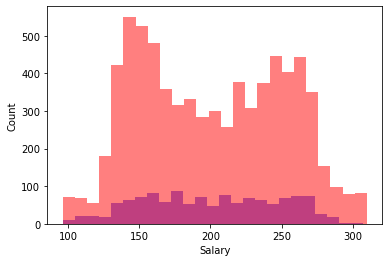

In [12]:
plt.hist(high_salary_hours, color='blue', alpha=0.5, bins=25);
plt.xlabel('Salary')
plt.ylabel('Count')
plt.hist(low_salary_hours, color='red', alpha=0.5, bins=25);

Описание: высокое p-value говорит о схожести выборок.

Интерпретация: мы не можем утверждать, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом. 

Гипотеза не подтверждена.


### 8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

### 8.1 Для уволившихся.

In [13]:
df_left = df[df['left'] == 1]

In [14]:
part = (len(df_left[df_left['promotion_last_5years'] == 1])/len(df_left))*100
print(f"Доля сотрудников с повышением за последние 5 лет: {round(part, 2)}%")

satisfaction = df_left['satisfaction_level'].mean()
print(f"Средняя степень удовлетворенности: {round(satisfaction, 2)}")

projects = df_left['number_project'].mean()
print(f"Среднее количество проектов: {round(projects, 2)} ({int(projects)})")

Доля сотрудников с повышением за последние 5 лет: 0.53%
Средняя степень удовлетворенности: 0.44
Среднее количество проектов: 3.86 (3)


### 8.2 Для работающих.

In [15]:
df_work = df[df['left'] == 0]

In [16]:
part = (len(df_work[df_work['promotion_last_5years'] == 1])/len(df_work))*100
print(f"Доля сотрудников с повышением за последние 5 лет: {round(part, 2)}%")

satisfaction = df_work['satisfaction_level'].mean()
print(f"Средняя степень удовлетворенности: {round(satisfaction, 2)}")

projects = df_work['number_project'].mean()
print(f"Среднее количество проектов: {round(projects, 2)} ({int(projects)})")

Доля сотрудников с повышением за последние 5 лет: 2.63%
Средняя степень удовлетворенности: 0.67
Среднее количество проектов: 3.79 (3)


### 9. Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
Оценить качество модели на тестовой выборке

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

In [18]:
X = df.loc[:, ~df.columns.isin(['department', 'salary'])]
y = df['left']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [45]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [67]:
y_pred = lda.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7557777777777778